# Self Organizing Maps

In [23]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [24]:
# Importing the dataset
# http://archive.ics.uci.edu/ml/datasets/statlog+(australian+credit+approval)
dataset = pd.read_csv('Credit_Card_Applications.csv')
X = dataset.iloc[:, :-1].values
y = dataset.iloc[:, -1].values
dataset.head(15)
# dataset.iloc[:, 1:-1]

,CustomerID,A1,A2,A3,A4,A5,A6,A7,A8,A9,A10,A11,A12,A13,A14,Class
0,15776156,1,22.08,11.460,2,4,4,1.585,0,0,0,1,2,100,1213,0
1,15739548,0,22.67,7.000,2,8,4,0.165,0,0,0,0,2,160,1,0
2,15662854,0,29.58,1.750,1,4,4,1.250,0,0,0,1,2,280,1,0
3,15687688,0,21.67,11.500,1,5,3,0.000,1,1,11,1,2,0,1,1
4,15715750,1,20.17,8.170,2,6,4,1.960,1,1,14,0,2,60,159,1
5,15571121,0,15.83,0.585,2,8,8,1.500,1,1,2,0,2,100,1,1
6,15726466,1,17.42,6.500,2,3,4,0.125,0,0,0,0,2,60,101,0
7,15660390,0,58.67,4.460,2,11,8,3.040,1,1,6,0,2,43,561,1
8,15663942,1,27.83,1.000,1,2,8,3.000,0,0,0,0,2,176,538,0
9,15638610,0,55.75,7.080,2,4,8,6.750,1,1,3,1,2,100,51,0


In [25]:
# Feature Scaling
from sklearn.preprocessing import MinMaxScaler
sc = MinMaxScaler(feature_range = (0, 1))
X = sc.fit_transform(X)
X

array([[8.42681467e-01, 1.00000000e+00, 1.25263158e-01, ...,
        5.00000000e-01, 5.00000000e-02, 1.21200000e-02],
       [6.96090562e-01, 0.00000000e+00, 1.34135338e-01, ...,
        5.00000000e-01, 8.00000000e-02, 0.00000000e+00],
       [3.88981656e-01, 0.00000000e+00, 2.38045113e-01, ...,
        5.00000000e-01, 1.40000000e-01, 0.00000000e+00],
       ...,
       [4.39420332e-01, 0.00000000e+00, 7.63909774e-02, ...,
        5.00000000e-01, 5.00000000e-02, 0.00000000e+00],
       [8.44034934e-01, 0.00000000e+00, 2.05563910e-01, ...,
        5.00000000e-01, 6.00000000e-02, 1.10000000e-04],
       [1.06907888e-01, 1.00000000e+00, 4.09774436e-01, ...,
        0.00000000e+00, 2.80000000e-01, 0.00000000e+00]])

In [29]:
# Training the SOM
from minisom import MiniSom
som = MiniSom(x = 10, y = 10, input_len = 15, sigma = 1.0, learning_rate = 0.25)
som.random_weights_init(X)
som.train_random(data = X, num_iteration = 100)

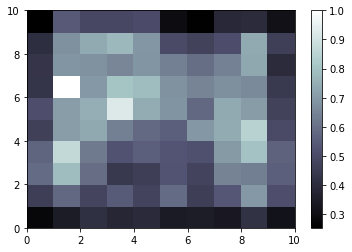

In [30]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
show()

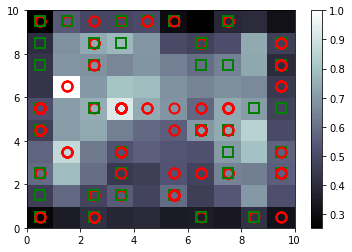

In [31]:
# Visualizing the results
from pylab import bone, pcolor, colorbar, plot, show
bone()
pcolor(som.distance_map().T)
colorbar()
markers = ['o', 's']
colors  = ['r', 'g']
for i, x in enumerate(X):
    w = som.winner(x)
    plot(w[0] + 0.5,
         w[1] + 0.5,
         markers[y[i]],
         markeredgecolor = colors[y[i]],
         markerfacecolor = 'None',
         markersize = 10,
         markeredgewidth = 2)
show()

In [32]:
# Finding the frauds
mappings = som.win_map(X)
frauds = np.concatenate((mappings[(0,4)], mappings[(1,3)]), axis = 0)
frauds = sc.inverse_transform(frauds)
for client in frauds:
    print(client[0])

15726466.0
15692408.0
15767729.0
15694530.0
15605791.0
15711446.0
15737627.0
15709459.0
15752139.0
15766906.0
15667451.0
15600975.0
15763108.0
15655464.0
15787693.0
15723989.0
15688210.0
15698271.0
15704509.0
15699340.0
15798895.0
15732884.0
15644400.0
15684440.0
15730287.0
15720353.0
15706637.0
15793366.0
15736510.0
15730673.0
15623668.0
15708236.0
15686670.0
15617065.0
15813363.0
15736420.0
15726167.0
15624850.0
15765093.0
15779492.0
15742297.0
15688059.0
15700549.0
15707042.0
15778589.0
15660263.0
15632275.0
15737542.0
15768777.0
15791326.0
15615176.0
15735221.0
15782089.0
15656417.0
15748691.0
15779586.0
15748986.0
15727811.0
15702030.0
15665590.0
15741633.0
15666297.0
15652667.0
15769980.0
15565714.0
15650313.0
15642063.0
15588019.0
15654760.0
15575146.0
15611794.0


---
# SimpSOM

Periodic Boundary Conditions active.
The weights will be initialised randomly.
Training SOM... done!


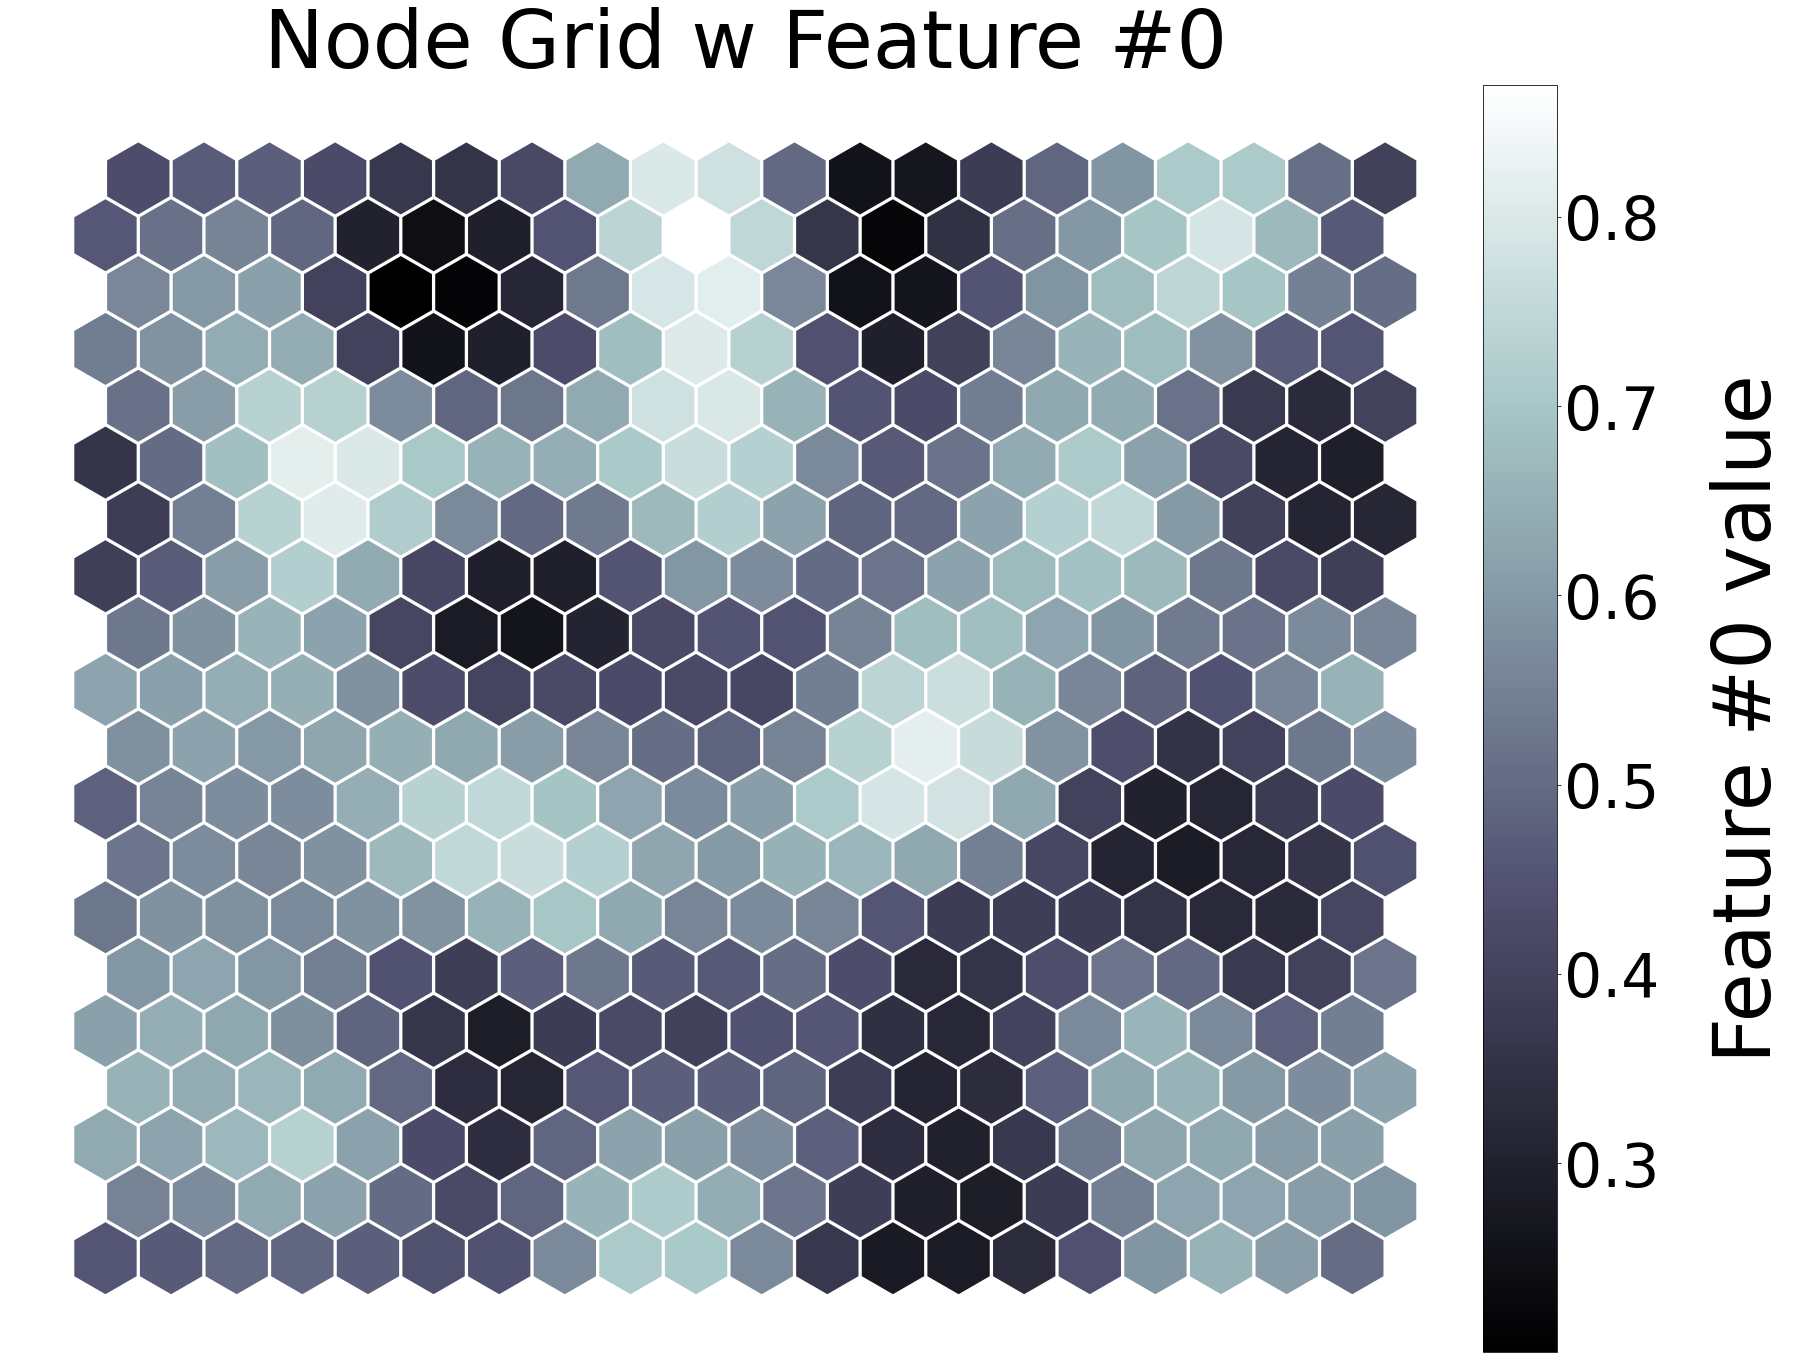

In [33]:
# ! pip install SimpSOM
import pandas as pd
import SimpSOM as sps
from sklearn.cluster import KMeans
import numpy as np

net = sps.somNet(20, 20, X, PBC=True)
net.train(1.5, 800)
# net.save(‘filename_weights’)
net.nodes_graph(colnum=0)

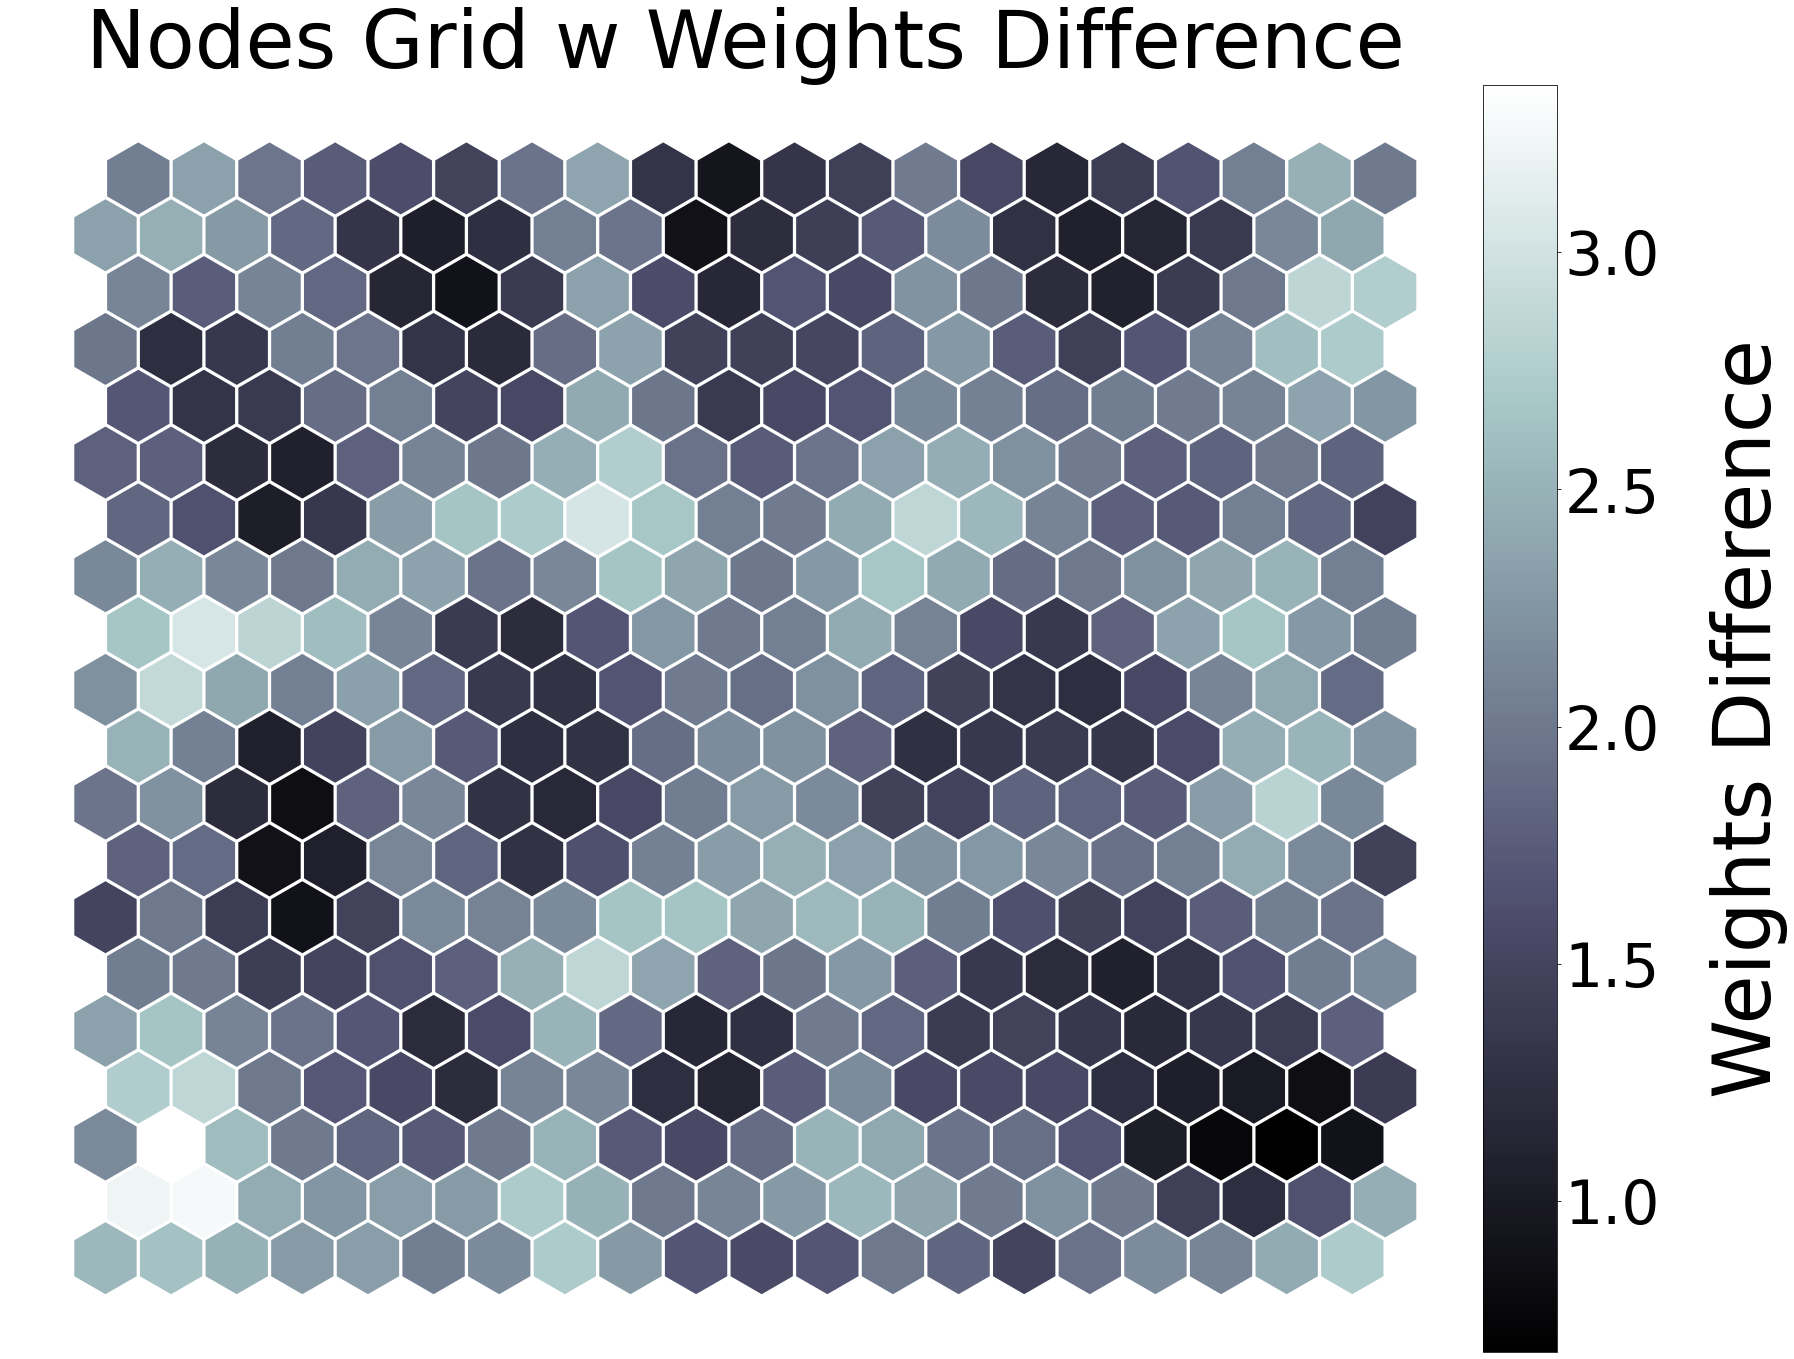

In [34]:
net.diff_graph()

In [35]:
#Project the datapoints on the new 2D network map.
net.project(X)

[[16.5, 16.454482671904337],
 [13, 8.660254037844387],
 [17, 12.124355652982143],
 [2, 10.392304845413264],
 [3, 5.196152422706632],
 [7.5, 9.526279441628825],
 [18, 1.7320508075688776],
 [5, 8.660254037844387],
 [15, 5.196152422706632],
 [1.5, 12.99038105676658],
 [4.5, 16.454482671904337],
 [4.5, 16.454482671904337],
 [6, 15.588457268119896],
 [6, 12.124355652982143],
 [14, 0.0],
 [18, 3.4641016151377553],
 [5.5, 12.99038105676658],
 [8, 6.9282032302755105],
 [16, 3.4641016151377553],
 [7.5, 7.794228634059948],
 [13, 8.660254037844387],
 [10, 10.392304845413264],
 [18, 3.4641016151377553],
 [9, 1.7320508075688776],
 [12.5, 4.330127018922194],
 [6, 12.124355652982143],
 [15.5, 4.330127018922194],
 [6, 15.588457268119896],
 [8, 6.9282032302755105],
 [5, 13.856406460551021],
 [5.5, 16.454482671904337],
 [17.5, 12.99038105676658],
 [12, 13.856406460551021],
 [4.5, 16.454482671904337],
 [19, 15.588457268119896],
 [18.5, 6.062177826491071],
 [11, 0.0],
 [3.5, 16.454482671904337],
 [3, 12.1

<Figure size 432x288 with 0 Axes>

In [36]:
#Cluster the datapoints according to the Quality Threshold algorithm.
net.cluster(X, type='qthresh')	

[[0,
  6,
  8,
  14,
  18,
  23,
  24,
  26,
  32,
  36,
  47,
  50,
  51,
  52,
  53,
  58,
  60,
  67,
  72,
  75,
  76,
  77,
  84,
  85,
  88,
  90,
  91,
  92,
  95,
  97,
  101,
  107,
  109,
  110,
  111,
  114,
  121,
  127,
  132,
  134,
  142,
  150,
  151,
  152,
  155,
  156,
  157,
  159,
  160,
  164,
  165,
  166,
  168,
  180,
  183,
  186,
  187,
  190,
  193,
  206,
  209,
  212,
  216,
  218,
  221,
  224,
  225,
  226,
  232,
  238,
  243,
  250,
  251,
  253,
  256,
  257,
  258,
  259,
  268,
  269,
  271,
  272,
  275,
  277,
  280,
  281,
  282,
  283,
  284,
  287,
  290,
  301,
  302,
  303,
  310,
  314,
  321,
  323,
  326,
  329,
  331,
  333,
  335,
  340,
  341,
  344,
  349,
  351,
  354,
  356,
  364,
  366,
  371,
  381,
  382,
  383,
  390,
  391,
  395,
  404,
  409,
  410,
  421,
  422,
  424,
  429,
  431,
  436,
  439,
  440,
  441,
  442,
  444,
  447,
  448,
  451,
  458,
  462,
  465,
  474,
  476,
  479,
  481,
  482,
  489,
  494,
  500,
  50

<Figure size 432x288 with 0 Axes>